# K-means


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data

In [3]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster 
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[60.11809843  5.07671279]
[30.18297379  5.38691654]


In [4]:
X_train 

array([[75.42461649,  4.74022271],
       [66.13407009,  5.81829646],
       [62.09351574,  4.94720396],
       [48.29528741,  4.7215795 ],
       [48.64300243,  5.15626132],
       [28.00760049,  6.11655669],
       [ 6.03062095,  5.19543976],
       [42.7014236 ,  5.09773119],
       [40.54277858,  4.39988644],
       [33.63244535,  6.12496861]])

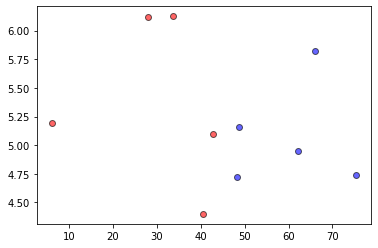

In [5]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [6]:
X_train

array([[75.42461649,  4.74022271],
       [66.13407009,  5.81829646],
       [62.09351574,  4.94720396],
       [48.29528741,  4.7215795 ],
       [48.64300243,  5.15626132],
       [28.00760049,  6.11655669],
       [ 6.03062095,  5.19543976],
       [42.7014236 ,  5.09773119],
       [40.54277858,  4.39988644],
       [33.63244535,  6.12496861]])

In [7]:
X_train.shape

(10, 2)

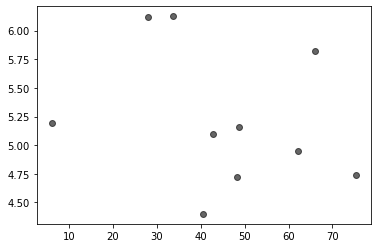

In [8]:
plot_scatter(X_train)
plt.show()

In [9]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [45.15053611  5.23181466]
std: [19.10529765  0.56785328]


##  K-means algorithm

    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:

    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [10]:
kmeans = KMeans(init='random',n_clusters=4).fit(X_train)
kmeans

KMeans(init='random', n_clusters=4)

In [11]:
kmeans.predict([[80, 0], [100, 3]])

array([0, 0])

In [12]:
kmeans.predict([[28, 5]])

array([2])

In [13]:
kmeans.predict(X_train)

array([0, 0, 0, 3, 3, 2, 1, 3, 3, 2])

In [14]:
kmeans.cluster_centers_

array([[67.88406744,  5.16857438],
       [ 6.03062095,  5.19543976],
       [30.82002292,  6.12076265],
       [45.045623  ,  4.84386461]])

In [15]:
X_train

array([[75.42461649,  4.74022271],
       [66.13407009,  5.81829646],
       [62.09351574,  4.94720396],
       [48.29528741,  4.7215795 ],
       [48.64300243,  5.15626132],
       [28.00760049,  6.11655669],
       [ 6.03062095,  5.19543976],
       [42.7014236 ,  5.09773119],
       [40.54277858,  4.39988644],
       [33.63244535,  6.12496861]])

In [16]:
kmeans.labels_

array([0, 0, 0, 3, 3, 2, 1, 3, 3, 2])

####  Coordinates of cluster centers. 

In [17]:
kmeans.cluster_centers_

array([[67.88406744,  5.16857438],
       [ 6.03062095,  5.19543976],
       [30.82002292,  6.12076265],
       [45.045623  ,  4.84386461]])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [18]:
kmeans.predict(X_train)

array([0, 0, 0, 3, 3, 2, 1, 3, 3, 2])

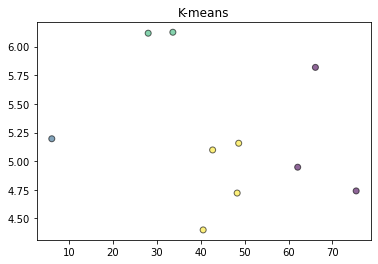

In [19]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [20]:
kmeans.cluster_centers_

array([[67.88406744,  5.16857438],
       [ 6.03062095,  5.19543976],
       [30.82002292,  6.12076265],
       [45.045623  ,  4.84386461]])

In [21]:
kmeans.cluster_centers_[:,1]

array([5.16857438, 5.19543976, 6.12076265, 4.84386461])

In [22]:
kmeans.predict(X_train)

array([0, 0, 0, 3, 3, 2, 1, 3, 3, 2])

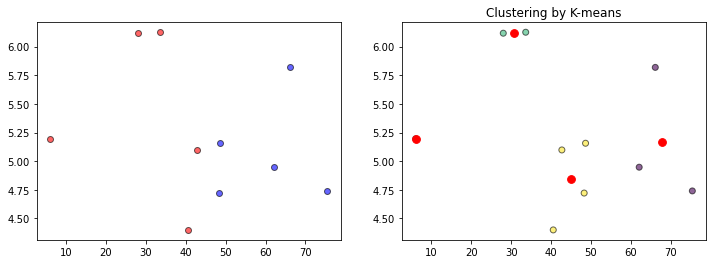

In [23]:

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train)/len(kmeans.cluster_centers_))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


#### Number of iterations run

In [24]:
kmeans.n_iter_

3

In [25]:
def distance(x, y):   
    return np.sum((x - y) ** 2)


def score(x,model):
    '''
    cluster: sample pointes 
    '''
    score=0 
    n_cluster=len(model.cluster_centers_)
    for c in range(n_cluster):
         score+=distance(x[model.labels_==c],model.cluster_centers_[c])
    
    return score


In [26]:
score(X_train,kmeans)

159.57341026642035

In [27]:
# skelearn : inertia_
kmeans.inertia_ 

159.57341026642032

## Exercise 

In [28]:
kmeans.predict(X_train)

array([0, 0, 0, 3, 3, 2, 1, 3, 3, 2])

In [29]:
np.bincount((kmeans.predict(X_train)))

array([3, 1, 2, 4], dtype=int64)

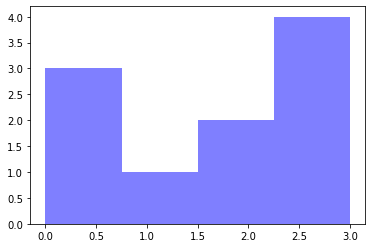

In [30]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
numBins = len(np.bincount((kmeans.predict(X_train))))
plt.hist(kmeans.predict(X_train),numBins,color='b',alpha=0.5)
plt.show()

## make a circle  Dataset
       make_circles(): Make a large circle containing a smaller circle in 2d
        factor: Scale factor between inner and outer circle. ( 0 < double < 1 (default=.8))

In [31]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 
X[:10]

array([[-0.97084503, -0.12673179],
       [-0.01989117, -0.45880462],
       [ 0.95036645,  0.21475102],
       [ 0.3868271 ,  0.25685525],
       [-0.53375109, -0.00663921],
       [ 0.34970205, -0.2956982 ],
       [-0.41722927,  0.81854348],
       [-0.47625865,  0.08139568],
       [ 0.42783229,  0.26529816],
       [ 0.36259195, -0.27483444]])

In [32]:
y[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

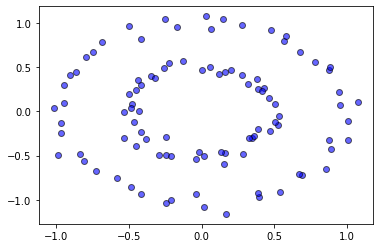

In [33]:
plot_scatter(X,'b')
plt.show() 

## Exercise
    如果使用K-means(n_clusters=2)結果為何?

In [34]:
kmeans = KMeans(init='random',n_clusters=2).fit(X)
kmeans

KMeans(init='random', n_clusters=2)

In [35]:
kmeans.cluster_centers_

array([[-0.13824005,  0.45716552],
       [ 0.14402526, -0.48306983]])

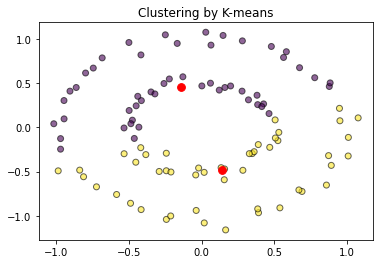

In [36]:
kmeans = KMeans(init='k-means++',n_clusters=2).fit(X)
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


In [37]:
kmeans

KMeans(n_clusters=2)

## manually set centroid
If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [38]:
kmeans

KMeans(n_clusters=2)

In [39]:
i=0

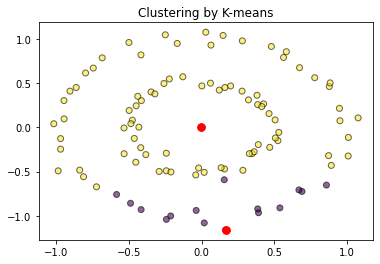

In [40]:
manual= np.array([[30, 10],
                  [0.0, 0.0]],
                    np.float64)
i+=1
kmeans = KMeans(init=manual,n_clusters=2,n_init=1,max_iter=1).fit(X)
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()

Exercise

In [41]:
L=np.array([[1,1],[2,2]])
L

array([[1, 1],
       [2, 2]])

In [42]:
# cluster 
x1 = [1,3,4,5,1,4,1,2]  # np.random.normal(mu,sigma,size))
y1 = [3,3,3,3,2,2,1,1]
X=np.array(list(zip(x1,y1)))

X

array([[1, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [1, 2],
       [4, 2],
       [1, 1],
       [2, 1]])

In [43]:
kmeans = KMeans(init='k-means++',n_clusters=3).fit(X)

In [44]:
kmeans.cluster_centers_

array([[1.  , 2.5 ],
       [4.  , 2.75],
       [1.5 , 1.  ]])

In [45]:
kmeans.labels_

array([0, 1, 1, 1, 0, 1, 2, 2])

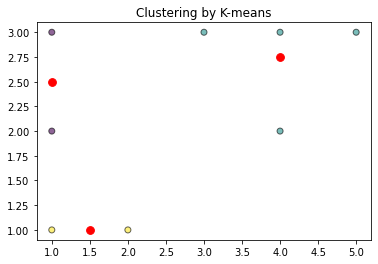

In [46]:
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


## Apply K-means with re-scaled data

## Feature Re-scale 

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[45.15053611  5.23181466]
[19.10529765  0.56785328]


In [48]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)


In [49]:
np.round(np.mean(X_train_std,axis=0),2)

array([0., 0.])

In [50]:
np.std(X_train_std,axis=0)

array([1., 1.])

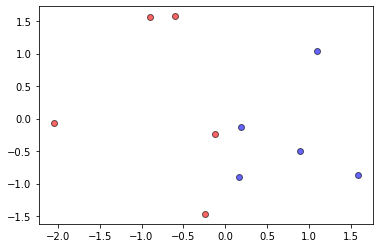

In [51]:
plot_scatter(X_train_std[:n1],color='b')
plot_scatter(X_train_std[n1:],color='r')

In [52]:
kmeans_std = KMeans(n_clusters=2, random_state=0).fit(X_train_std)
kmeans_std 

KMeans(n_clusters=2, random_state=0)

In [53]:
kmeans_std.labels_

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

####  Coordinates of cluster centers

In [54]:
kmeans_std.cluster_centers_

array([[ 0.50682234, -0.43812148],
       [-1.18258546,  1.02228346]])

### plot

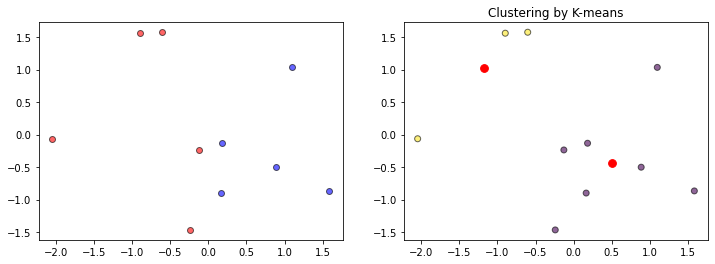

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(X_train_std[:n1],color='b')
plot_scatter(X_train_std[n1:],color='r')
plt.subplot(122)
plot_scatter(X_train_std,kmeans_std.predict(X_train_std))
plt.scatter(kmeans_std.cluster_centers_[:,0],kmeans_std.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


#### Number of iterations run

In [56]:
kmeans_std.n_iter_

2

### Score

In [57]:
score(X_train_std,kmeans_std)

9.527549235190579

In [58]:
kmeans_std.inertia_ 

9.52754923519058

## for test data

In [59]:
test_X=[[0, 0], [50, 4]]
kmeans_std.predict(test_X)  #Wrong cluster space

array([0, 0])

In [60]:
test_X_std=sc.transform(test_X)
print(test_X_std)
kmeans_std.predict(test_X_std)  #Wrong

[[-2.36324694 -9.21332113]
 [ 0.25382823 -2.16924811]]


array([0, 0])

In [61]:
kmeans_std.inertia_ 

9.52754923519058